<a href="https://colab.research.google.com/github/pinggu95/deep_dive_AI/blob/main/37%EC%9D%BC%EC%B0%A8_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Failure Prediction Dataset

[Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?resource=download)


| 항목                 | 설명                                                                                                                                                          |
| ------------------ | ----------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Age**            | 환자의 나이 (단위: 세)                                                                                                                                              |
| **Sex**            | 환자의 성별<br>**M**: 남성<br>**F**: 여성                                                                                                                            |
| **ChestPainType**  | 가슴 통증의 유형<br>**TA**: 전형적 협심증 (Typical Angina)<br>**ATA**: 비전형적 협심증 (Atypical Angina)<br>**NAP**: 비협심증성 통증 (Non-Anginal Pain)<br>**ASY**: 무증상 (Asymptomatic) |
| **RestingBP**      | 안정 시 혈압 (단위: mm Hg)                                                                                                                                         |
| **Cholesterol**    | 혈중 콜레스테롤 수치 (단위: mg/dl)                                                                                                                                     |
| **FastingBS**      | 공복 혈당<br>**1**: 120 mg/dl 초과<br>**0**: 120 mg/dl 이하                                                                                                         |
| **RestingECG**     | 안정 시 심전도 검사 결과<br>**Normal**: 정상<br>**ST**: ST-T파 이상 (T파 역전, ST 상승 또는 하강 등)<br>**LVH**: 좌심실 비대 (Estes 기준에 따른 가능성 있음)                                        |
| **MaxHR**          | 운동 중 도달한 최대 심박수 (범위: 60\~202)                                                                                                                               |
| **ExerciseAngina** | 운동 유발 협심증 여부<br>**Y**: 있음<br>**N**: 없음                                                                                                                      |
| **Oldpeak**        | ST 분절의 하강 정도 (운동 후 심전도에서 측정된 수치, 단위: 숫자)                                                                                                                    |
| **ST\_Slope**      | 운동 시 ST 분절의 기울기<br>**Up**: 상승형<br>**Flat**: 평평함<br>**Down**: 하강형                                                                                            |
| **HeartDisease**   | 심장 질환 여부 (예측 대상 클래스)<br>**1**: 심장 질환 있음<br>**0**: 정상                                                                                                        |


#  데이터 탐색 및 가공


In [210]:
import pandas as pd
import numpy as np

df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/딥다이브/heart.csv')


In [211]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# EDA(탐색적 데이터 분석)

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [213]:
df.shape

(918, 12)

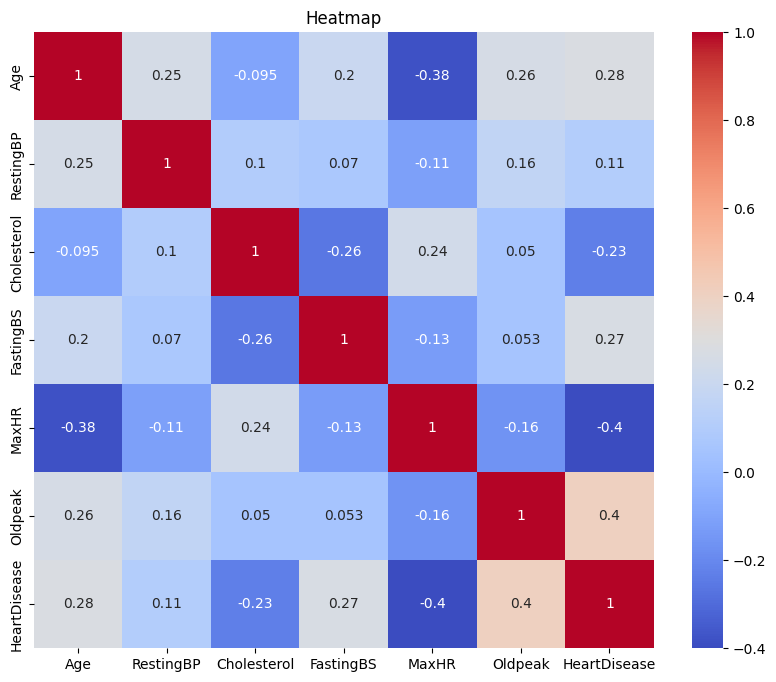

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Heatmap")
plt.show()

In [215]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [216]:
df.value_counts()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease
77   M    ASY            125        304          0          LVH         162    Y               0.0      Up        1               1
28   M    ATA            130        132          0          LVH         185    N               0.0      Up        0               1
29   M    ATA            120        243          0          Normal      160    N               0.0      Up        0               1
                         130        204          0          LVH         202    N               0.0      Up        0               1
                         140        263          0          Normal      170    N               0.0      Up        0               1
                                                                                                                                 ..
32   M    ATA            125        254          0          Normal      155    N               0.0      Up        0               1
                         110        225          0          Normal      184    N               0.0      Up        0               1
          ASY            118        529          0          Normal      130    N               0.0      Flat      1               1
     F    ATA            105        198          0          Normal      165    N               0.0      Up        0               1
31   M    ASY            120        270          0          Normal      153    Y               1.5      Flat      1               1
Name: count, Length: 918, dtype: int64

## 영향 적은 데이터 제거

In [217]:
df = df.drop(['Cholesterol'], axis=1)
df

,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,0,LVH,174,N,0.0,Flat,1


## 결측치 확인

In [218]:
# 결측값 없다
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0
ST_Slope,0


#Feature Engineering


## 레이블 인코딩

In [219]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    df[col] = le.fit_transform(df[col])

##원핫인코딩

In [220]:
# import pandas as pd

# # 예시: df는 전체 데이터셋 (아직 train/test로 나누지 않음)
# df_encoded = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   FastingBS       918 non-null    int64  
 5   RestingECG      918 non-null    int64  
 6   MaxHR           918 non-null    int64  
 7   ExerciseAngina  918 non-null    int64  
 8   Oldpeak         918 non-null    float64
 9   ST_Slope        918 non-null    int64  
 10  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 79.0 KB


#모델링 및 하이퍼파라미터 튜닝


In [222]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df[['Age', 'Sex', 'ChestPainType','RestingBP']]  # 특성
y = df['HeartDisease']               # 레이블 (target)


# 데이터셋 분할: 80% 학습용, 20% 테스트용
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 테스트 데이터 비율
    random_state=42,
    stratify=y
)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 랜덤포레스트 분류

In [206]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# 모델 생성 및 학습
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# 예측
y_pred = clf.predict(X_test)


In [59]:
# 정확도 (Accuracy): 0.8586956521739131
# 정밀도 (Precision): 0.8653846153846154
# 재현율 (Recall): 0.8823529411764706
# F1 점수 (F1 Score): 0.8737864077669902

#  classification_report:
#               precision    recall  f1-score   support

#            0       0.85      0.83      0.84        82
#            1       0.87      0.88      0.87       102

#     accuracy                           0.86       184
#    macro avg       0.86      0.86      0.86       184
# weighted avg       0.86      0.86      0.86       184


# 'Age', 'Sex', 'ChestPainType','RestingBP'
# 정확도 (Accuracy): 0.717391304347826
# 정밀도 (Precision): 0.7840909090909091
# 재현율 (Recall): 0.6764705882352942
# F1 점수 (F1 Score): 0.7263157894736842

#  classification_report:
#               precision    recall  f1-score   support

#            0       0.66      0.77      0.71        82
#            1       0.78      0.68      0.73       102

#     accuracy                           0.72       184
#    macro avg       0.72      0.72      0.72       184
# weighted avg       0.73      0.72      0.72       184

##로지스틱 회귀 (Logistic Regression)

In [60]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000) #최대 1000번까지 반복
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [61]:
# 정확도 (Accuracy): 0.875
# 정밀도 (Precision): 0.8558558558558559
# 재현율 (Recall): 0.9313725490196079
# F1 점수 (F1 Score): 0.892018779342723

#  classification_report:
#               precision    recall  f1-score   support

#            0       0.90      0.80      0.85        82
#            1       0.86      0.93      0.89       102

#     accuracy                           0.88       184
#    macro avg       0.88      0.87      0.87       184
# weighted avg       0.88      0.88      0.87       184


## SVM (Support Vector Classifier)

In [62]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [63]:
# 정확도 (Accuracy): 0.717391304347826
# 정밀도 (Precision): 0.75
# 재현율 (Recall): 0.7352941176470589
# F1 점수 (F1 Score): 0.7425742574257426

#  classification_report:
#               precision    recall  f1-score   support

#            0       0.68      0.70      0.69        82
#            1       0.75      0.74      0.74       102

#     accuracy                           0.72       184
#    macro avg       0.71      0.72      0.71       184
# weighted avg       0.72      0.72      0.72       184

## 결정 트리 (Decision Tree)



In [92]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [93]:
# 정확도 (Accuracy): 0.8097826086956522
# 정밀도 (Precision): 0.8252427184466019
# 재현율 (Recall): 0.8333333333333334
# F1 점수 (F1 Score): 0.8292682926829268

#  classification_report:
#               precision    recall  f1-score   support

#            0       0.79      0.78      0.79        82
#            1       0.83      0.83      0.83       102

#     accuracy                           0.81       184
#    macro avg       0.81      0.81      0.81       184
# weighted avg       0.81      0.81      0.81       184

## 그래디언트 부스팅 (Gradient Boosting)   <- 가장 성능이 좋다


In [223]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
# 정확도 (Accuracy): 0.8858695652173914
# 정밀도 (Precision): 0.900990099009901
# 재현율 (Recall): 0.8921568627450981
# F1 점수 (F1 Score): 0.896551724137931

#  classification_report:
#               precision    recall  f1-score   support

#            0       0.87      0.88      0.87        82
#            1       0.90      0.89      0.90       102

#     accuracy                           0.89       184
#    macro avg       0.88      0.89      0.88       184
# weighted avg       0.89      0.89      0.89       184


# 'Age', 'Sex', 'ChestPainType','RestingBP'
# 정확도 (Accuracy): 0.7608695652173914
# 정밀도 (Precision): 0.8222222222222222
# 재현율 (Recall): 0.7254901960784313
# F1 점수 (F1 Score): 0.7708333333333334

#  classification_report:
#               precision    recall  f1-score   support

#            0       0.70      0.80      0.75        82
#            1       0.82      0.73      0.77       102

#     accuracy                           0.76       184
#    macro avg       0.76      0.77      0.76       184
# weighted avg       0.77      0.76      0.76       184



## XGBoost (XGBClassifier)

In [125]:
from xgboost import XGBClassifier

model = XGBClassifier(eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [126]:
# 정확도 (Accuracy): 0.875
# 정밀도 (Precision): 0.8910891089108911
# 재현율 (Recall): 0.8823529411764706
# F1 점수 (F1 Score): 0.8866995073891626

#  classification_report:
#               precision    recall  f1-score   support

#            0       0.86      0.87      0.86        82
#            1       0.89      0.88      0.89       102

#     accuracy                           0.88       184
#    macro avg       0.87      0.87      0.87       184
# weighted avg       0.88      0.88      0.88       184


## LightGBM (LGBMClassifier)



In [123]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(
    random_state=42,
    min_child_samples=5,
    min_split_gain=0.0,
    num_leaves=31
)
model.fit(X_train_scaled, y_train)

[LightGBM] [Info] Number of positive: 406, number of negative: 328
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000078 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 380
[LightGBM] [Info] Number of data points in the train set: 734, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553134 -> initscore=0.213340
[LightGBM] [Info] Start training from score 0.213340


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LGBMClassifier(min_child_samples=5, random_state=42)

In [ ]:
# 정확도 (Accuracy): 0.875
# 정밀도 (Precision): 0.8910891089108911
# 재현율 (Recall): 0.8823529411764706
# F1 점수 (F1 Score): 0.8866995073891626

#  classification_report:
#               precision    recall  f1-score   support

#            0       0.86      0.87      0.86        82
#            1       0.89      0.88      0.89       102

#     accuracy                           0.88       184
#    macro avg       0.87      0.87      0.87       184
# weighted avg       0.88      0.88      0.88       184


#평가 Metric 분석하기

In [224]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

# 평가
print("정확도 (Accuracy):", accuracy_score(y_test, y_pred))
print("정밀도 (Precision):", precision_score(y_test, y_pred))
print("재현율 (Recall):", recall_score(y_test, y_pred))
print("F1 점수 (F1 Score):", f1_score(y_test, y_pred))

# 전체 분류 리포트
print("\n classification_report:")
print(classification_report(y_test, y_pred))

정확도 (Accuracy): 0.7608695652173914
정밀도 (Precision): 0.8222222222222222
재현율 (Recall): 0.7254901960784313
F1 점수 (F1 Score): 0.7708333333333334

 classification_report:
              precision    recall  f1-score   support

           0       0.70      0.80      0.75        82
           1       0.82      0.73      0.77       102

    accuracy                           0.76       184
   macro avg       0.76      0.77      0.76       184
weighted avg       0.77      0.76      0.76       184



## Confusion Matrix 시각화

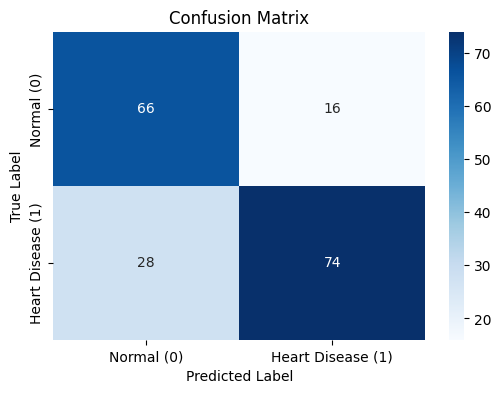

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# 1. 혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred)
labels = ['Normal (0)', 'Heart Disease (1)']

# 2. 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


##  ROC Curve 시각화

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


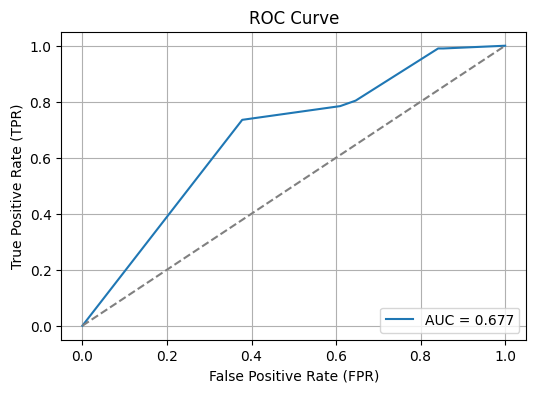

In [226]:

# 예측 확률 얻기 (predict_proba 또는 predict(logits) 사용)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]  # 클래스 1에 대한 확률

# ROC Curve 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# 시각화
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()